# GRO620 - Activité procédurale 1

Dans cette activité, nous allons principalement travailler sur les éléments nécessaires pour capter une image numériquement, les transformations entre repères 2D et 3D, et l'encodage numérique de la couleur.

In [24]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Acquisition

### Q1.1

À partir de la figure 2.23 du livre de référence, décrivez en une phrase le rôle de chacune des étapes de la chaîne d'acquisition d'images numériques.

*(réponse ici)*

### Q1.2

Quelle est la différence entre paramètres intrinsèques et extrinsèques du caméra ? Décrivez chaque type en une phrase.

*(réponse ici)*

### Q1.3

Soit la configuration intrinsèque d'une caméra représentée par la matrice $K$ :

$$
K = \begin{bmatrix} 
 620 &   0 & 1024 \\ 
   0 & 620 &  512 \\ 
   0 &   0 &    1 
\end{bmatrix}
$$

Le capteur de cette caméra a une taille de 30 mm x 15 mm.

Pouvez-vous estimer la distance focale en mm de la lentille de cette caméra à partir de la matrice $K$ ?

In [25]:
# Réponse ici.
K = np.array([[620.,   0., 1024.],
              [  0., 620.,  512.],
              [  0.,   0.,    1.]
])
f = 0


### Q1.4

Dans le cadre de cet APP, nous considérons les caméras comme étant idéales, c'est-à-dire qu'on peut obtenir leurs caractéristiques intrinsèques et extrinsèques à partir de quelques paramètres seulement.

**a)** Qu'est-ce qui rend les vraies caméras non-idéales ? Nommez des facteurs autant pour les caractéristiques intrinsèques que extrinsèques.

*(réponse ici)*

**b)** Que doit on faire pour obtenir les caractéristiques d'une caméra non-idéale ?

*(réponse ici)*

## Repères et coordonnées

### Q2.1

Supposons ces 2 repères :

![](images_doc/proc1-q2_1-frames.png)

**a)** Trouvez la matrice homogène permettant de transformer un point du repère $\{1\}$ au repère $\{0\}$.

In [26]:
T_10 = np.identity(4) # Génère une matrice identité 4x4
print("T_10:\n", T_10)

T_10:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


**b)** Trouvez maintenant la transformation inverse.

In [27]:
T_01 = np.identity(4)

**c)** Soit le point $p_0 = [8, 5, 1]^T$, un point dans le repère $\{0\}$. Trouvez $p_1$, ses coordonnées dans le repère $\{1\}$.

In [28]:
p_0 = [8, 5, 1]
p_1 = [0, 0, 0]

### Q2.2

Supposons maintenant que le repère $\{1\}$ représente une caméra avec les caractéristiques intrinsèques $K$ de la question Q1.3.

**a)** Trouvez la matrice de projection P complète permettant de projeter un point $p$ décrit dans le repère $\{0\}$.

In [29]:
print(K) # Si vous n'avez pas réutilisé la variable K, elle aura toujours la même valeur qu'à la question Q1.3.

[[6.200e+02 0.000e+00 1.024e+03]
 [0.000e+00 6.200e+02 5.120e+02]
 [0.000e+00 0.000e+00 1.000e+00]]


**b)** Soit le point $p_0 = [0.250, 0.010, 0.000]$. Trouvez le point $x_s$, les coordonnées du point $p_0$ perçu par la caméra.

In [30]:
p_0 = np.array([0.250, 0.010, 0.000])

## Encodage de l'image

Pour les questions suivantes, vous aurez probablement besoin de lire la documentation de cv2.imread et matplotlib.pyplot.imshow :

[imread](https://pythonexamples.org/python-opencv-read-image-cv2-imread/)

[imshow](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html)

Le code suivant charge une image et l'affiche en ligne :

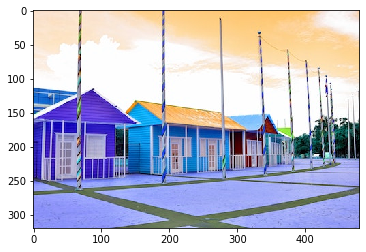

In [31]:
img_color = cv2.imread("images_doc/proc1-q3-color.jpeg")
plt.imshow(img_color)

(source de l'image: [PixaBay, Pexels](https://www.pexels.com/photo/apartment-architecture-block-blue-534124/))

### Q3.1

**a)** Ouvrez directement l'image dans un autre logiciel (le fichier se trouve dans images_doc/proc1-q3-color.jpeg) et comparez le résultat. Que remarquez vous ?

(réponse ici)

**b)** Affichez seulement le premier canal de couleurs de l'image. Pensez à analyser la composition de la matrice image que OpenCV vous retourne. Expliquez ensuite ce que vous voyez.

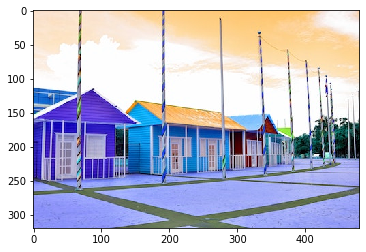

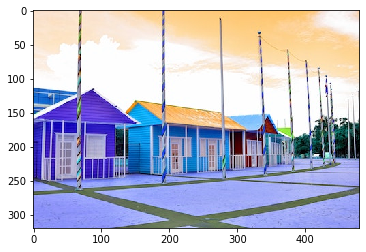

In [32]:
plt.imshow(img_color)              # Image originale
plt.figure()                       # Permet d'afficher plus d'une image dans la même cellule
plt.imshow(img_color, cmap="gray") # Le paramètre cmap n'a pas d'effet sur une image à plus d'un canal.

**c)** Transformez maintenant l'image pour que les couleurs correspondent à ce que vous voyez en dehors de Jupyter.

In [33]:
img_correcte = img_color.copy() # Permet de forcer une copie de l'image.
                                # img_correcte = img_color aurait modifié l'originale.
# ...

### Q3.2

Soit cette couleur dans l'espace Y'CbCr (on suppose chaque valeur comme étant encodée sur 8 bits) :

$c = [100, 150, 150]$

Trouvez sa valeur équivalente dans l'espace RGB.

In [34]:
c = np.array([100,150,150])

### Q3.3

**a)** Pourquoi deux appareils de capture peuvent produire des valeurs RGB différentes d'une même couleur ? 

*(réponse ici)*

**b)** Que peut-on faire pour comparer numériquement des couleurs provenant de deux capteurs différents ?

*(réponse ici)*

## Caractéristiques de la lumière

### Q4.1

Dans cette image synthétique : 

![](images_doc/proc1-q4-specular.jpg)

(source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Specular_highlight.jpg))

**a) Quelle(s) partie(s) correspondent à l'illumination diffuse et les reflets spéculaires ?

*(réponse ici)*

**b)** Quelle information est nécessaire pour déterminer les caractéristiques et emplacements exacts des sources de lumières dans cette image ? Répondez en utilisant des éléments de la *Bidirectional Reflectance Distribution Function* (BRDF).

*(réponse ici)*

## Reprojection 2D à 3D

### Q5.1

Supposons que le plan XY du repère $\{0\}$ est un convoyeur. Quelle serait sa largeur maximale (mesurée sur l'axe Y) si on souhaite que la caméra la capte au complet dans son image ? 

In [35]:
l_conv = 0

### Q5.2

Soit le point $x_s = [120, 200]$, un point dans l'image perçu par la caméra décrite plus haut. On suppose que le point perçu se trouve sur le plan XY du repère $\{0\}$. Trouvez les coordonnées du point $p_0$ qui correspond à ce même point dans le repère $\{0\}$.

In [36]:
x_s = np.array([120,200])